## Homework 8: Jitted Mandelbrot set

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objs as go
from time import time
from numba import jit
import cProfile
from IPython.display import Image

### Functions

In [3]:
def juliaSet(len_points: int, xmin: int, xmax: int, ymin: int, ymax: int, maxiter: int, C: complex):
    x = np.linspace(xmin, xmax, len_points)
    y = np.linspace(ymin, ymax, len_points)
    output = np.zeros((len(y), len(x)))

    for i, xcoord in enumerate(x):
        for j, ycoord in enumerate(y):
            n = 0
            z = complex(xcoord, ycoord)
            while abs(z) <= 2.0 and n < maxiter:
                z = z**2 + C
                n += 1
            output[i, j] = n / maxiter
    return output

@jit
def jit_juliaSet(len_points: int, xmin: int, xmax: int, ymin: int, ymax: int, maxiter: int, C: complex):
    x = np.linspace(xmin, xmax, len_points)
    y = np.linspace(ymin, ymax, len_points)
    output = np.zeros((len(y), len(x)))

    for i, xcoord in enumerate(x):
        for j, ycoord in enumerate(y):
            n = 0
            z = complex(xcoord, ycoord)
            while abs(z) <= 2.0 and n < maxiter:
                z = z**2 + C
                n += 1
            output[i, j] = n / maxiter
    return output

### Task 8.1

#### Numba-based Implementation

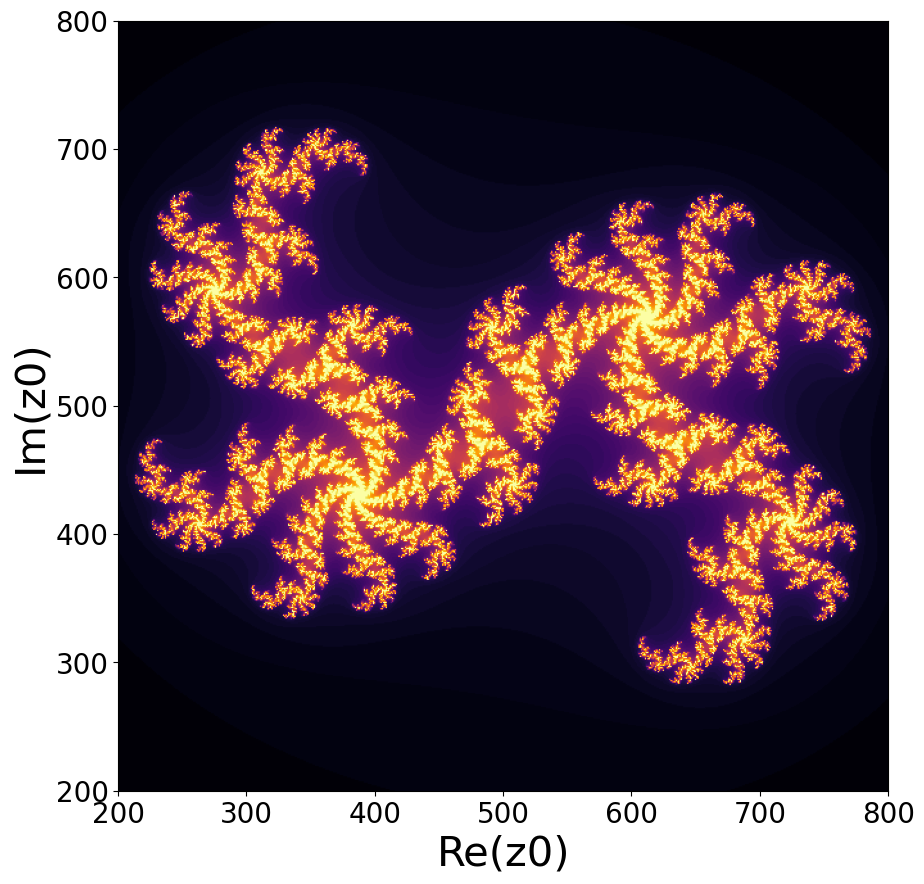

In [4]:
C1 = complex(0.4, 0.2)
output1 = jit_juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=70,
    C=C1
)

fig = plt.figure(figsize=[15, 10], )
plt.imshow(output1, cmap=plt.cm.inferno)
plt.xlabel('Re(z0)', fontsize=30)
plt.xticks(fontsize=20)
plt.xlim([200, 800])
plt.ylabel('Im(z0)', fontsize=30)
plt.yticks(fontsize=20)
plt.ylim([200, 800])
plt.show()

### Task 8.2

#### Profile Numba-based Implementation

In [26]:
cProfile.run('''jit_juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=70,
    C=C1
)''')

         5 function calls in 0.048 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.047    0.047    0.047    0.047 4108569813.py:16(jit_juliaSet)
        1    0.001    0.001    0.048    0.048 <string>:1(<module>)
        1    0.001    0.001    0.001    0.001 serialize.py:29(_numba_unpickle)
        1    0.000    0.000    0.048    0.048 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




#### Regular version

In [28]:
%%timeit
juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=70,
    C=C1
)

2.44 s ± 71.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Numba-based version

In [29]:
%%timeit
jit_juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=70,
    C=C1
)

50.1 ms ± 712 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Task 8.3

In [6]:
start_time = time()
C3 = [complex(np.cos(a), np.sin(a)) for a in np.linspace(0, 2*np.pi, 101)]
results = [
    juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=50,
    C=c
    ) 
    for c in C3
]
end_time = time()
reg_time = end_time - start_time

start_time = time()
C3 = [complex(np.cos(a), np.sin(a)) for a in np.linspace(0, 2*np.pi, 101)]
results = [
    jit_juliaSet(
    len_points=1001,
    xmin=-2,
    xmax=2,
    ymin=-2,
    ymax=2,
    maxiter=50,
    C=c
    ) 
    for c in C3
]
end_time = time()
jit_time = end_time - start_time

In [7]:
print(f'Acceleration: {(reg_time / jit_time):.2f}')

Acceleration: 55.97


### Task 8.4

In [8]:
fig = go.Figure()

fig.add_trace(go.Histogram(histfunc= 'max',
                        x = ['Regular', 'Numba-based'], 
                            y = [reg_time, jit_time], 
                            name = 'nme',
                            ))

fig.update_layout(font_size = 25,
                    font_color='black',
                    title = "Evaluation",
                    plot_bgcolor = 'rgba(250,250,250,1)',
                    width = 700,
                    height = 700,
                    # LEGEND
                    legend_title = "Models",
                    legend_font_size = 25,
                    legend_x = 1.02,
                    legend_y = 1,
                    #legend_bordercolor = 'black',
                    #legend_borderwidth = 1,
                    legend_itemsizing = 'trace',
                    legend_itemwidth=100,                      
                    # X-axis
                    xaxis_title = "Methods",
                    xaxis_nticks = 7,
                    xaxis_ticklen = 16,
                    xaxis_tickwidth = 3,
                    xaxis_ticks = 'outside',
                    # Y-axis
                    yaxis_title = "Time, s",
                    yaxis_nticks = 10,
                    yaxis_ticklen = 16,
                    yaxis_tickwidth = 3,                                           
                    yaxis_ticks = 'outside'                     
                    )
    
fig.add_shape(type="rect",
                xref="paper",
                yref="paper",
                x0=0,
                y0=0,
                x1=1.0,
                y1=1.0,
        line=dict(
            color="black",
                width=1,))
fig.layout.font.family = 'sans-serif'
fig.write_image(file="HW_8_evaluation.png",
                format='png',
                width=700,
                height=700,
                scale=1
                )
fig.show()

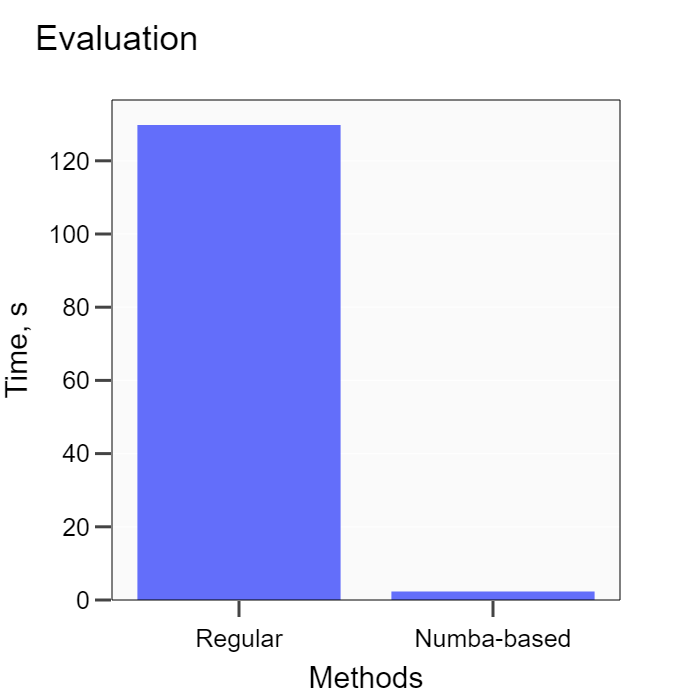

In [9]:
Image(open("HW_8_evaluation.png", 'rb').read())